モジュールのインポート 

In [113]:
from numpy import *
from pylab import *
import Optimizer_with_theano as op 
%matplotlib inline

yの時系列データをシーケンシャルに10個から、1時刻あとのデータ予測する学習器をつくる

# データの生成

In [114]:
def gen_dataset(v, length):
    v = v.flatten()
    idx = arange(v.size)
    idx = idx[:, None] + arange(length+1)
    idx = idx[:-length]
    xidx = idx[:, :-1]
    yidx = idx[:, -1]
    x_idx_f = xidx.flatten()
    y_idx_f = yidx.flatten()
    x = v[x_idx_f].reshape(-1, 1, 1, length)
    y = v[y_idx_f][:, None]
    return x, y, xidx, yidx

#v = zeros(1000)
#for i in range(10000):
#    v += sin(pi * arange(1000) / randint(10, 1000) + randint(0, 1000)) * arange(1000)[::-1]
v = sin(pi * arange(10000) / arange(1,10001)[::-1]*10) * arange(10000)[::-1]# + random(v.size) * arange(1000)[::-1] * 1
v = v[:-1000]
#v = sin(pi * arange(1000) / 30) * arange(1000)# + random(v.size) * arange(1000)[::-1] * 1
x, y, xidx, yidx = gen_dataset(v, 10)

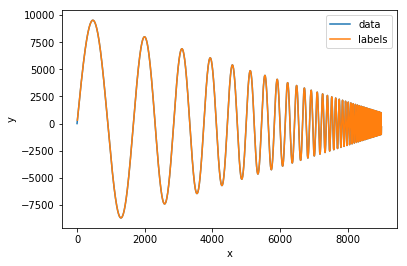

In [115]:
#plot(xidx.flatten(),x.flatten())
plot(arange(v.size),v)
plot(yidx.flatten(),y.flatten())
#xlim(8500,9500)
xlabel("x")
ylabel("y")
legend(["data", "labels"])

データ及びラベルの形は以下の通りである。

In [116]:
print("Shape of x = {}".format(x.shape))
print("Shape of y = {}".format(y.shape))

Shape of x = (8990, 1, 1, 10)
Shape of y = (8990, 1)


# 学習

## UCNNの構築

theanoは1次元の畳込みが無いので、2次元畳込みを用いる 

In [117]:

o = op.optimizer(n_batch=100)
o.set_data(x, y, test_size=0., is_shuffle=False)
o.set_variables()
o1 =  o.conv2d((1, 1, 1, 5), mode="same").relu()
o2 = o1.conv2d((1, 1, 1, 5), mode="same").relu()
o3 = o2.conv2d((1, 1, 1, 5), mode="same").relu()
o4 = o3.conv2d((1, 1, 1, 5), mode="same").relu()
o5 = o4.conv2d((1, 1, 1, 5), mode="same").relu() + o2 #前段の畳込み層をマージ
o6 = o5.conv2d((1, 1, 1, 5), mode="same").relu() + o1 #前段の畳込み層をマージ
o7 = o6.conv2d((1, 1, 1, 5), mode="same").relu()
o8 = o7.conv2d((1, 1, 1, 10), mode="valid")
o9 = o8.flatten()
o = o9.loss_mse()



(1, 1, 1)


In [133]:

o = op.optimizer(n_batch=1000)
o.set_data(x, y, test_size=0., is_shuffle=False)
o.set_variables()
o1  =  o.conv2d((1, 1, 1, 5), mode="same").relu()
o2  = o1.conv2d((1, 1, 1, 5), mode="same").relu()
o3  = o2.conv2d((1, 1, 1, 5), mode="same").relu()
o4  = o3.conv2d((1, 1, 1, 5), mode="same").relu()
o5  = o4.conv2d((1, 1, 1, 5), mode="same").relu() 
o6  = o5.conv2d((1, 1, 1, 5), mode="same").relu() 
o7  = o6.conv2d((1, 1, 1, 5), mode="same").relu() 
o8  = o7.conv2d((1, 1, 1, 5), mode="same").relu()  #前段の畳込み層をマージ
o9  = o8.conv2d((1, 1, 1, 5), mode="same").relu()  #前段の畳込み層をマージ
o10 = o9.conv2d((1, 1, 1, 5), mode="same").relu() 
o11 = o10.conv2d((1, 1, 1, 5), mode="same").relu() #+ o10
o12 = o11.conv2d((1, 1, 1, 5), mode="same").relu() #+ o9
o13 = o12.conv2d((1, 1, 1, 5), mode="same").relu() #+ o8
o14 = o13.conv2d((1, 1, 1, 5), mode="same").relu() #+ o7
o15 = o14.conv2d((1, 1, 1, 5), mode="same").relu() #+ o6
o16 = o15.conv2d((1, 1, 1, 5), mode="same").relu() #+ o5
o17 = o16.conv2d((1, 1, 1, 5), mode="same").relu() #+ o4
o18 = o17.conv2d((1, 1, 1, 5), mode="same").relu() + o3 #前段の畳込み層をマージ
o19 = o18.conv2d((1, 1, 1, 5), mode="same").relu() + o2 #前段の畳込み層をマージ
o20 = o19.conv2d((1, 1, 1, 5), mode="same").relu() 
o21 = o20.conv2d((1, 1, 1, 10), mode="valid")
o22 = o21.flatten()
o   = o22.loss_mse()



(1, 1, 1)


最適化手法を定義し、最適化させる。 

In [118]:
o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,10)

Epoch. 0: loss = 3.8524e+13, acc = 0.0000e+00, valid. loss = 1.9675e+10, valid. acc. = 0.0000e+00.
Epoch. 10: loss = 1.5786e+10, acc = 0.0000e+00, valid. loss = 1.5539e+10, valid. acc. = 0.0000e+00.
Epoch. 20: loss = 1.1667e+10, acc = 0.0000e+00, valid. loss = 1.1488e+10, valid. acc. = 0.0000e+00.
Epoch. 30: loss = 8.0800e+09, acc = 0.0000e+00, valid. loss = 7.9004e+09, valid. acc. = 0.0000e+00.
Epoch. 40: loss = 5.1516e+09, acc = 0.0000e+00, valid. loss = 5.0464e+09, valid. acc. = 0.0000e+00.
Epoch. 50: loss = 3.0697e+09, acc = 0.0000e+00, valid. loss = 2.9849e+09, valid. acc. = 0.0000e+00.
Epoch. 60: loss = 1.6792e+09, acc = 0.0000e+00, valid. loss = 1.6162e+09, valid. acc. = 0.0000e+00.
Epoch. 70: loss = 8.1092e+08, acc = 0.0000e+00, valid. loss = 7.8192e+08, valid. acc. = 0.0000e+00.
Epoch. 80: loss = 3.3685e+08, acc = 0.0000e+00, valid. loss = 3.1962e+08, valid. acc. = 0.0000e+00.
Epoch. 90: loss = 1.1926e+08, acc = 0.0000e+00, valid. loss = 1.1236e+08, valid. acc. = 0.0000e+00.
E

Epoch. 820: loss = 1.0475e+05, acc = 0.0000e+00, valid. loss = 6.1912e+04, valid. acc. = 0.0000e+00.
Epoch. 830: loss = 6.4422e+04, acc = 0.0000e+00, valid. loss = 2.1884e+04, valid. acc. = 0.0000e+00.
Epoch. 840: loss = 3.2659e+04, acc = 0.0000e+00, valid. loss = 3.7907e+04, valid. acc. = 0.0000e+00.
Epoch. 850: loss = 1.2131e+04, acc = 0.0000e+00, valid. loss = 8.9091e+03, valid. acc. = 0.0000e+00.
Epoch. 860: loss = 1.4582e+05, acc = 0.0000e+00, valid. loss = 2.2214e+04, valid. acc. = 0.0000e+00.
Epoch. 870: loss = 2.9153e+04, acc = 0.0000e+00, valid. loss = 3.9394e+04, valid. acc. = 0.0000e+00.
Epoch. 880: loss = 2.0052e+04, acc = 0.0000e+00, valid. loss = 4.9822e+03, valid. acc. = 0.0000e+00.
Epoch. 890: loss = 1.8683e+04, acc = 0.0000e+00, valid. loss = 2.8596e+04, valid. acc. = 0.0000e+00.
Epoch. 900: loss = 2.6252e+04, acc = 0.0000e+00, valid. loss = 1.7596e+04, valid. acc. = 0.0000e+00.
Epoch. 910: loss = 3.3001e+04, acc = 0.0000e+00, valid. loss = 1.0987e+04, valid. acc. = 0.

In [120]:
o = o.opt_Adam(0.001).compile()
o = o.optimize(10000000,10)


Epoch. 0: loss = 1.3169e+04, acc = 0.0000e+00, valid. loss = 5.3139e+03, valid. acc. = 0.0000e+00.
Epoch. 10: loss = 2.2580e+03, acc = 0.0000e+00, valid. loss = 1.5942e+03, valid. acc. = 0.0000e+00.
Epoch. 20: loss = 1.6064e+03, acc = 0.0000e+00, valid. loss = 1.4537e+03, valid. acc. = 0.0000e+00.
Epoch. 30: loss = 1.3587e+03, acc = 0.0000e+00, valid. loss = 1.6240e+03, valid. acc. = 0.0000e+00.
Epoch. 40: loss = 1.6730e+03, acc = 0.0000e+00, valid. loss = 1.2400e+03, valid. acc. = 0.0000e+00.
Epoch. 50: loss = 1.4517e+03, acc = 0.0000e+00, valid. loss = 1.5582e+03, valid. acc. = 0.0000e+00.
Epoch. 60: loss = 1.3897e+03, acc = 0.0000e+00, valid. loss = 1.6878e+03, valid. acc. = 0.0000e+00.
Epoch. 70: loss = 1.1510e+03, acc = 0.0000e+00, valid. loss = 8.8843e+02, valid. acc. = 0.0000e+00.
Epoch. 80: loss = 1.0825e+03, acc = 0.0000e+00, valid. loss = 9.4587e+02, valid. acc. = 0.0000e+00.
Epoch. 90: loss = 1.3499e+03, acc = 0.0000e+00, valid. loss = 2.0312e+03, valid. acc. = 0.0000e+00.
E

In [ ]:

o = o.opt_Adam(0.0001).compile()
o = o.optimize(10000000,10)

Epoch. 0: loss = 7.4066e+02, acc = 0.0000e+00, valid. loss = 5.4975e+02, valid. acc. = 0.0000e+00.
Epoch. 10: loss = 5.3114e+02, acc = 0.0000e+00, valid. loss = 5.2667e+02, valid. acc. = 0.0000e+00.
Epoch. 20: loss = 5.2646e+02, acc = 0.0000e+00, valid. loss = 5.3838e+02, valid. acc. = 0.0000e+00.
Epoch. 30: loss = 5.2169e+02, acc = 0.0000e+00, valid. loss = 5.2412e+02, valid. acc. = 0.0000e+00.
Epoch. 40: loss = 5.1974e+02, acc = 0.0000e+00, valid. loss = 5.1799e+02, valid. acc. = 0.0000e+00.
Epoch. 50: loss = 5.2103e+02, acc = 0.0000e+00, valid. loss = 5.1707e+02, valid. acc. = 0.0000e+00.
Epoch. 60: loss = 5.1497e+02, acc = 0.0000e+00, valid. loss = 5.1308e+02, valid. acc. = 0.0000e+00.
Epoch. 70: loss = 5.3506e+02, acc = 0.0000e+00, valid. loss = 5.1639e+02, valid. acc. = 0.0000e+00.
Epoch. 80: loss = 5.1125e+02, acc = 0.0000e+00, valid. loss = 5.1784e+02, valid. acc. = 0.0000e+00.
Epoch. 90: loss = 5.1153e+02, acc = 0.0000e+00, valid. loss = 5.1259e+02, valid. acc. = 0.0000e+00.
E

Epoch. 820: loss = 4.4891e+02, acc = 0.0000e+00, valid. loss = 4.5204e+02, valid. acc. = 0.0000e+00.
Epoch. 830: loss = 4.4048e+02, acc = 0.0000e+00, valid. loss = 4.4213e+02, valid. acc. = 0.0000e+00.
Epoch. 840: loss = 4.4665e+02, acc = 0.0000e+00, valid. loss = 4.4090e+02, valid. acc. = 0.0000e+00.
Epoch. 850: loss = 4.4108e+02, acc = 0.0000e+00, valid. loss = 4.4302e+02, valid. acc. = 0.0000e+00.
Epoch. 860: loss = 4.5029e+02, acc = 0.0000e+00, valid. loss = 4.6662e+02, valid. acc. = 0.0000e+00.
Epoch. 870: loss = 4.4114e+02, acc = 0.0000e+00, valid. loss = 4.4034e+02, valid. acc. = 0.0000e+00.
Epoch. 880: loss = 4.4396e+02, acc = 0.0000e+00, valid. loss = 4.4539e+02, valid. acc. = 0.0000e+00.
Epoch. 890: loss = 4.4414e+02, acc = 0.0000e+00, valid. loss = 4.3863e+02, valid. acc. = 0.0000e+00.
Epoch. 900: loss = 4.4189e+02, acc = 0.0000e+00, valid. loss = 4.4324e+02, valid. acc. = 0.0000e+00.
Epoch. 910: loss = 4.4592e+02, acc = 0.0000e+00, valid. loss = 4.4508e+02, valid. acc. = 0.

Epoch. 1630: loss = 4.2760e+02, acc = 1.1123e-04, valid. loss = 4.2513e+02, valid. acc. = 1.1123e-04.
Epoch. 1640: loss = 4.3010e+02, acc = 0.0000e+00, valid. loss = 4.2793e+02, valid. acc. = 0.0000e+00.
Epoch. 1650: loss = 4.3007e+02, acc = 0.0000e+00, valid. loss = 4.2733e+02, valid. acc. = 0.0000e+00.
Epoch. 1660: loss = 4.3109e+02, acc = 0.0000e+00, valid. loss = 4.3006e+02, valid. acc. = 0.0000e+00.
Epoch. 1670: loss = 4.2421e+02, acc = 1.1123e-04, valid. loss = 4.2549e+02, valid. acc. = 1.1123e-04.
Epoch. 1680: loss = 4.2728e+02, acc = 1.1123e-04, valid. loss = 4.2819e+02, valid. acc. = 1.1123e-04.
Epoch. 1690: loss = 4.2911e+02, acc = 1.1123e-04, valid. loss = 4.2367e+02, valid. acc. = 1.1123e-04.
Epoch. 1700: loss = 4.2591e+02, acc = 0.0000e+00, valid. loss = 4.2466e+02, valid. acc. = 0.0000e+00.
Epoch. 1710: loss = 4.3380e+02, acc = 0.0000e+00, valid. loss = 4.2531e+02, valid. acc. = 0.0000e+00.
Epoch. 1720: loss = 4.3458e+02, acc = 1.1123e-04, valid. loss = 4.3969e+02, valid.

In [ ]:
## 学習結果の評価

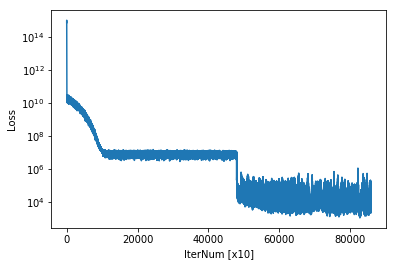

In [119]:
o.view()

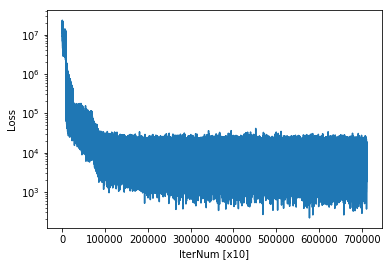

In [25]:
o.view()

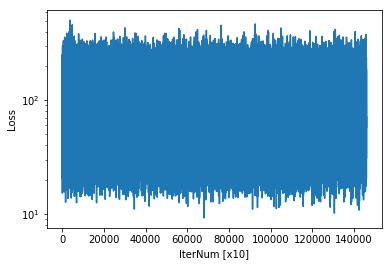

In [102]:
o.view()

TypeError: Bad input argument to theano function with name "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py:486" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-9eab7ada2cc0>", line 2, in <module>
    o = op.optimizer(100)      .set_datasets()      .reshape((1,28,28))      .conv_and_pool(2,3,3, "same")      .flatten().dense(10)      .softmax().loss_cross_entropy()      .opt_Adam(0.01).compile()      .optimize(10000, 10)
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 133, in set_datasets
    obj.set_variables()
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 106, in set_variables
    self.x = T.matrix("x")
Wrong number of dimensions: expected 2, got 4 with shape (990, 1, 1, 10).

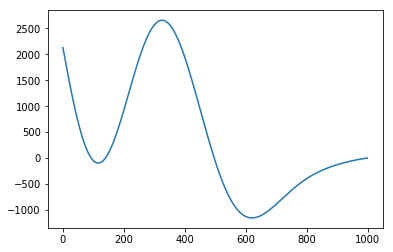

In [112]:
#plot(xidx.flatten(),x.flatten())
plot(arange(v.size),v)
#plot(yidx.flatten(),y.flatten())
plot(yidx, o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b")
#xlim(0,100)
xlabel("x")
ylabel("y")
legend(["data", "predict"])
#xlim(8900, 9100)
#ylim(-100, 100)

(-2000, 2000)

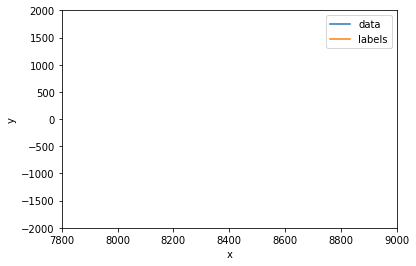

In [274]:
#plot(xidx.flatten(),x.flatten())
plot(arange(v.size),v)
plot(yidx.flatten(),y.flatten())
#plot(yidx, o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b")
#xlim(0,100)
xlabel("x")
ylabel("y")
legend(["data", "labels"])
xlim(7800, 9000)
ylim(-2000, 2000)

TypeError: Bad input argument to theano function with name "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py:486" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-9eab7ada2cc0>", line 2, in <module>
    o = op.optimizer(100)      .set_datasets()      .reshape((1,28,28))      .conv_and_pool(2,3,3, "same")      .flatten().dense(10)      .softmax().loss_cross_entropy()      .opt_Adam(0.01).compile()      .optimize(10000, 10)
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 133, in set_datasets
    obj.set_variables()
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 106, in set_variables
    self.x = T.matrix("x")
Wrong number of dimensions: expected 2, got 4 with shape (990, 1, 1, 10).

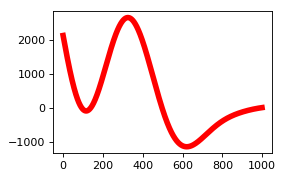

In [111]:
#figsize(10,10)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
is_first = True
for i in range(1,10,1):
    subplot(3, 3, i)
    v = zeros(1000)
    for i in range(10):
        #v += sin(pi * arange(1000) / 10) * arange(1000)[::-1]
        #v += sin(pi * arange(1000) / rand(1) / 100 + randint(0, 1000)) * arange(1000)[::-1]
        v += sin(pi * arange(1000) / randint(10, 1000) + randint(0, 1000)) * arange(1000)[::-1]
    #v2 = sin(pi * arange(1000) / 50) * arange(1000)[::-1]
    #v3 = cos(pi * arange(1000) / 250) * arange(1000)[::-1]
    #v = v + random(v.size)* arange(1000)[::-1] * 0.1
    #v = sin(pi * arange(1000) / 100) * arange(1000)[::-1] + random(v.size) * arange(1000)[::-1] * 1
    x, y, xidx, yidx = gen_dataset(v, 10) 
    #plot(xidx[0:100], x[0:100].reshape(-1,10), c="r")
    plot(arange(v.size),v, c="r",lw=5, label="Grand truth")
#plot(yidx.flatten(),y.flatten())
    plot(yidx, o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten(), c="b", label="Predict")
    plot(yidx, abs(y.flatten() - o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten()), c="g", label="Error")
    #xlim(0,300)
    
    #scatter(yidx[0:1000], o.y_train_arr[0:1000])
    xlabel("x")
    ylabel("y")
    if is_first:
        legend()
        is_first = False


In [108]:
line = loadtxt("/home/yu/Downloads/USDJPY.csv", delimiter=",")

適当な為替データ　http://www.m2j.co.jp/market/historical.php

In [109]:
line.shape

(2684, 4)

0


TypeError: Bad input argument to theano function with name "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py:486" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-9eab7ada2cc0>", line 2, in <module>
    o = op.optimizer(100)      .set_datasets()      .reshape((1,28,28))      .conv_and_pool(2,3,3, "same")      .flatten().dense(10)      .softmax().loss_cross_entropy()      .opt_Adam(0.01).compile()      .optimize(10000, 10)
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 133, in set_datasets
    obj.set_variables()
  File "/home/yu/jupyter/Optimizer_with_theano/Optimizer_with_theano/Optimizer.py", line 106, in set_variables
    self.x = T.matrix("x")
Wrong number of dimensions: expected 2, got 4 with shape (2674, 1, 1, 10).

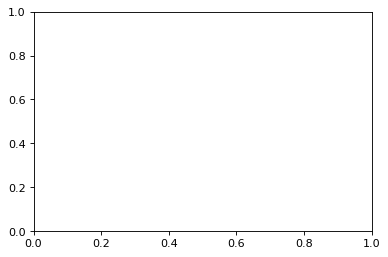

In [110]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
for i,l in enumerate(line.T):
    l *= 100
    print(i)
    subplot(2, 2, i+1)
    x, y, xidx, yidx = gen_dataset(l, 10) 
    plot(yidx, o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten())
    plot(yidx, y.astype(float32).flatten())
    #plot(yidx, y - o.pred_func(x.reshape(-1, 1, 1, 10).astype(float32)).flatten())
    #plot(line[:,0])
    xlim(90,100)